


https://www.mindat.org/climate.php


In [193]:
import numpy as np
import xarray as xr

In [194]:
def koppen_vd(precip, temp, south, writeout=False):

    temp_mean = temp.mean()  # mean air temperature
    prcp_sum = precip.sum()  #  sum precipitation
    prcp_min = precip.min() 
    temp_min = temp.min()
    temp_max = temp.max()
    
    nu_mon_gt10deg = (temp > 10).astype(int).sum()

    mon_sw = [[3,4,5,6,7,8], [0,1,2,9,10,11]] # summer from April - December, winter is remaining months
    if bool(south): mon_ind = { 'summer': mon_sw[1], 'winter': mon_sw[0] }
    else: mon_ind = { 'summer': mon_sw[0], 'winter': mon_sw[1] }
    
    prcp_summer = precip[mon_ind['summer']]
    prcp_winter = precip[mon_ind['winter']]

    if prcp_winter.sum() > 0.7 * prcp_sum:
        prcp_threshold = 20 * temp_mean
    elif prcp_summer.sum() > 0.7 * prcp_sum:  # summer
        prcp_threshold = 20 * temp_mean + 280
    else:
        prcp_threshold = 20 * temp_mean + 140   
        
    prcp_summer_min = prcp_summer.min()
    prcp_summer_max = prcp_summer.max()
    prcp_winter_min = prcp_winter.min()
    prcp_winter_max = prcp_winter.max()    
    
    
    '''
    print('mean temperature: ', temp_mean)
    print('max temperature: ', temp_max)
    print('min temperature: ', temp_min)
    print('num of months hotter than 10 deg: ', nu_mon_gt10deg)
    print('precip threshold: ',prcp_threshold)
    print('minimum summer precip: ',prcp_summer_min)
    print('maximum summer precip: ',prcp_summer_max)
    print('minimum winter rain: ',prcp_winter_min)
    print('maximum winter rain: ',prcp_winter_max)
    print('annual accum rain: ', prcp_sum)
    print('mininum monthly rain: ', prcp_min)
    '''
    outstr = {'mean temperature': temp_mean, 
              'max temperature': temp_max,
              'min temperature':  temp_min,
              'num of months hotter than 10 deg': nu_mon_gt10deg,
              'precip threshold': prcp_threshold,
              'minimum summer precip': prcp_summer_min,
              'maximum summer precip': prcp_summer_max,
              'minimum winter rain: ': prcp_winter_min,
              'maximum winter rain: ': prcp_winter_max,
              'annual accum rain: ': prcp_sum,
              'mininum monthly rain': prcp_min 
             }

    # classification conditionals
    '''
    Desert and semi-arid climates are defined by low precipitation in a region 
     that does not fit the polar (EF or ET) criteria of no month with 
     an average temperature greater than 10 °C 
    '''
    if prcp_sum < prcp_threshold:
        koppenClass = "B"
        
        if prcp_sum < prcp_threshold / 2.:
            koppenClass = koppenClass + "W" # arid: desert climate
        else:
            koppenClass = koppenClass + "S" # semi-arid: steppe climate
            
        if temp_mean >= 18:
            koppenClass = koppenClass + "h" # Here, h signifies low-latitude climates
        else:
            koppenClass = koppenClass + "k" # k signifies middle-latitude climates (average annual temperature less than 18 °C).
   
        '''
        # Tropical climates have an average temperature of 18 deg C or 
        # higher every month of the year, with significant precipitation.
        '''
    elif temp_min >= 18: 
        koppenClass = "A"
        # Tropical rainforest climate; average precipitation of at least 60 mm in every month.
        if prcp_min >= 60:  
            koppenClass = koppenClass + "f"
        # Tropical monsoon climate; driest month (which nearly always occurs at or soon after the "winter" solstice for that side of the equator) with precipitation less than 60 mm (2.4 in), but at least
        else:
            if prcp_min >= 100 - prcp_sum / 25:  
                koppenClass = koppenClass + "m"
            #Tropical wet and dry or savanna climate; with the driest month having precipitation less than 60 mm (2.4 in) and less than
            else:
                koppenClass = koppenClass + "w"
        '''
        Group C: Temperate climates
        '''         
    elif temp_max > 10 and 0 < temp_min < 18:
        koppenClass = "C"
        if prcp_summer_min < 40 and prcp_summer_min < prcp_winter_max / 3:
            koppenClass = koppenClass + "s"
        elif prcp_winter_min < prcp_summer_max / 10:
            koppenClass = koppenClass + "w"
        else:
            koppenClass = koppenClass + "f"
        if temp_max >= 22:
            koppenClass = koppenClass + "a"
        else:
            if nu_mon_gt10deg >= 4:
                koppenClass = koppenClass + "b"
            elif 1 <= nu_mon_gt10deg < 4:
                koppenClass = koppenClass + "c"
                
    elif temp_max > 10 and temp_min <= 0:
        koppenClass = "D"
        if prcp_summer_min < 40 and prcp_summer_min < prcp_winter_max / 3:
            koppenClass = koppenClass + "s"
        elif prcp_winter_min < prcp_summer_max / 10:
            koppenClass = koppenClass + "w"
        else:
            koppenClass = koppenClass + "f"
            
        if temp_max >= 22:
            koppenClass = koppenClass + "a"
        else:
            if nu_mon_gt10deg >= 4:
                koppenClass = koppenClass + "b"
            elif temp_min < -38:
                koppenClass = koppenClass + "d"
            else:
                koppenClass = koppenClass + "c"
                
    elif temp_max <= 10:
        koppenClass = "E"
        if temp_max > 0:
            koppenClass = koppenClass + "T"
        else:
            koppenClass = koppenClass + "F"

    else:
        koppenClass = 'Unknown'
    if writeout:
        return koppenClass, outstr
    else:
        return koppenClass

In [200]:



import matplotlib.pyplot as plt
def plot_hythergraph( temperature,
                    #temperature_max, 
                    # temperature_min, 
                     precipitation, title = 'Climograph'):
    # plotting
    # Example monthly climate data
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    lab1, lab2, lab3 = 'Temperature (°C)', 'Min Temperature (°C)', 'Precipitation (mm)'
    tit1 = 'Hythergraph: Monthly Temperature and Precipitation\n'
    xlab, ylab1, ylab2 = 'Month', 'Temperature (°C)', 'Precipitation (mm)'


    # Create figure and axis
    fig = plt.figure(figsize= [6,4] )
    ax1 = plt.axes( [.15,.2,.7,.65] )

    # Plot temperature data
    #ax1.plot(months, temperature_max, 'o--', color='darkred', label=lab1)
    #ax1.plot(months, temperature_min, 'o--', color='lightcoral', label=lab2)
    ax1.plot(months, temperature, 'o--', color='darkred', label=lab1)
    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab1, color='darkred')
    ax1.tick_params(axis='y', labelcolor='darkred')

    # Create a second y-axis to plot precipitation
    ax2 = ax1.twinx()
    ax2.bar(months, precipitation, alpha=0.3, color='green', label=lab3)
    ax2.set_ylabel(ylab2, color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Add title and show plot

    plt.title(title)

    fig.legend(loc='lower left', fontsize=9,ncols = 3, bbox_to_anchor=(0.2, -0.0))

    return fig



**
No                                                      18
Description           Hot-summer humid continental climate
Group                                   Cold (continental)
Precipitation Type                      Without dry season
Level of Heat                                   Hot summer
Color                                           powderblue
Name: Dfa, dtype: object


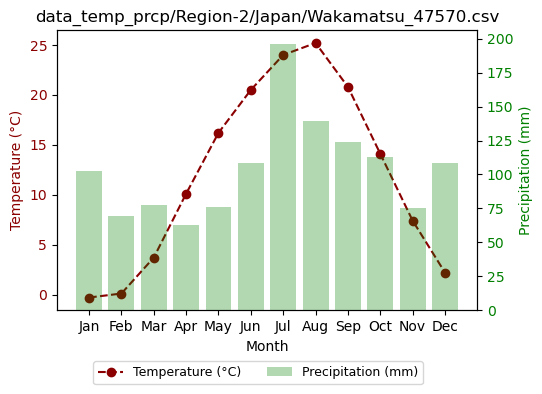

In [201]:
if __name__ == '__main__':
    
    
    print('**')
    import pandas as pd
    f = 'data_temp_prcp/Region-2/Japan/Wakamatsu_47570.csv'
    #df = pd.read_csv('data_temp_prcp/Region-2/Japan/Tokyo_47662.csv', index_col=0)
    df = pd.read_csv(f, index_col=0)
    precip, temp = df.Precipitation.values, df.Temperature.values
    
    if 0:
        precip = np.array([ 59.7,  56.5, 116. , 133.7, 139.7, 167.8, 156.2, 154.7, 224.9,
           234.8,  96.3,  57.9])
        temp = np.array([ 5.4,  6.1,  9.4, 14.3, 18.8, 21.9, 25.7, 26.9, 23.3, 18. , 12.5,
            7.7])
    
    fig = plot_hythergraph( temp,precip, title = f )
        
    #a = koppen_vd(precip, temp, False, True)
    
    
    a = koppen_vd(precip, temp, False)
    import pandas as pd
    kp = pd.read_excel('Koppen_class_list.xlsx', index_col=1)
    print(kp.loc[a])
    
    
    
    
    
    
    
    